In [53]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

In [11]:
df = pickle.load(open('../Data/doc2vec/mydoc2vec_200.pkl','rb'))

In [3]:
df.keys()

dict_keys(['Video_ID', 'a', 'view', 'transcript', 'rating'])

In [4]:
len(df['Video_ID'])

2383

In [12]:
div_dic = pickle.load(open('div_dic.pkl','rb'))

In [5]:
df['transcript'].shape

(2383, 200)

In [7]:
df['view'].shape

(2383,)

In [3]:
tid_seg = pickle.load(open('../Data/tid_vs_segments_eigen_values.pkl','rb'))

In [35]:
tid_vid_div = pickle.load(open('../Data/tid_vs_variation_visual.pkl','rb'))

In [38]:
len(tid_vid_div.keys())

2335

In [6]:
len(tid_seg.keys())

2379

In [39]:
def pad(vid_div_dic,visual_input_dic,transcript_dic,num_eig,max_vid_len):

    new_data_dic = {}
    visual_input_dic_keys = visual_input_dic.keys()
    vid_div_keys = vid_div_dic.keys()
    new_data_dic['Video_ID'] = []
    new_data_dic['input'] = []
    new_data_dic['rating'] = []
    new_data_dic['text_diversity'] = [] 
    new_data_dic['vid_diversity'] = []
    for k in range(2383):

        vid_id = transcript_dic['Video_ID'][k]
        if vid_id in visual_input_dic_keys and vid_id in vid_div_keys:
            seg_len = visual_input_dic[vid_id].shape[0]
            if seg_len<max_vid_len:
                lst = list(np.concatenate((visual_input_dic[vid_id][:,:num_eig].flatten(),np.zeros((max_vid_len- seg_len)*num_eig))))
            else:
                lst = list(visual_input_dic[vid_id][:max_vid_len,:num_eig].flatten())

            new_data_dic['Video_ID'].append(vid_id)
            new_data_dic['input'] = new_data_dic['input'] + list(transcript_dic['input'][k]) 
            new_data_dic['input'] = new_data_dic['input']+ lst
            new_data_dic['rating'] = new_data_dic['rating'] + list(transcript_dic['rating'][k])
            new_data_dic['text_diversity'].append(transcript_dic['text_diversity'][k])
            new_data_dic['vid_diversity'].append(vid_div_dic[vid_id])
    for k in new_data_dic.keys():
        new_data_dic[k] =  np.array(new_data_dic[k])
    new_data_dic['rating']=new_data_dic['rating'].reshape((-1,14))
    new_data_dic['input']=new_data_dic['input'].reshape((-1,208+num_eig*max_vid_len))
    
    return new_data_dic

In [40]:
new_dic = pad(tid_vid_div,tid_seg,all_data_dic,2,100)

In [41]:
pickle.dump(new_dic,open('../Data/doc2vec/joint_data_dic.pkl','wb'))

new_dic['input'].shape

(2335, 408)

In [50]:
_,_,test_idx = pickle.load(open('../Output/split_index.pkl','rb'))
print(len(test_idx))

467


In [46]:
vids = new_dic['Video_ID'][test_idx]

In [47]:
data_dict_predict,data_dict_true = pickle.load(open('../Output/test_output_transcript_plus_video_True_False_7_1_2.pkl','rb'))

In [48]:
data_dict_predict.keys()

dict_keys(['transcript', 'a', 'view', 'rating', 'un_norm_op'])

In [49]:
data_dict_predict['un_norm_op'].shape

torch.Size([467, 14])

In [51]:
norm_rating = data_dict_predict['un_norm_op']/data_dict_predict['un_norm_op'].sum(axis=1)[:,None]

In [52]:
print(norm_rating)

tensor([[0.0854, 0.0692, 0.0749,  ..., 0.0725, 0.0670, 0.0659],
        [0.0664, 0.0784, 0.0681,  ..., 0.0731, 0.0706, 0.0710],
        [0.0724, 0.0695, 0.0702,  ..., 0.0722, 0.0742, 0.0685],
        ...,
        [0.0603, 0.0736, 0.0693,  ..., 0.0737, 0.0791, 0.0714],
        [0.0711, 0.0784, 0.0734,  ..., 0.0743, 0.0515, 0.0633],
        [0.0672, 0.0751, 0.0653,  ..., 0.0774, 0.0707, 0.0751]])


In [ ]:
imp_index = [0]

In [ ]:
"Ratings": ['beautiful', 'confusing', 'courageous', 'fascinating', 'funny', 'informative', 'ingenious', 'inspiring', 'jaw-dropping', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing'],
"T+V": [0.74,0.60,0.72,0.72,0.76,0.73,0.70,0.69,0.66,0.62,0.63,0.68,0.70,0.66],
"T+V+both":[0.71,0.64,0.70,0.69,0.72,0.66,0.66,0.66,0.57,0.64,0.63,0.66,0.71,0.62],


In [69]:
rating_names = np.array(['beautiful', 'confusing', 'courageous', 'fascinating', 'funny', 'informative', 'ingenious', 'inspiring', 'jaw-dropping', 'longwinded', 'obnoxious', 'ok', 'persuasive', 'unconvincing'])
tv = np.array([0.74,0.60,0.72,0.72,0.76,0.73,0.70,0.69,0.66,0.62,0.63,0.68,0.70,0.66])
tvl = np.array([0.71,0.64,0.70,0.69,0.72,0.66,0.66,0.66,0.57,0.64,0.63,0.66,0.71,0.62])
spd_pred = [0.19, 0.24, 0.22, 0.17, 0.18, 0.03, 0.15, 0.08]
spd_both = [0.08, 0.17, 0.17, 0.06, 0.08, 0.01, 0.03, 0.05]

In [68]:
imp_index = [0,3,5,8,9,10,11,13]

In [70]:
df = pd.DataFrame({
"Ratings": rating_names[imp_index],
"T+V(ACC)":tv[imp_index] ,
"T+V+HEM(ACC)": tvl[imp_index],
"T+V(SPD)": spd_pred,
"T+V+HEM(SPD)": spd_both
})

In [71]:
df

Ratings  T+V(ACC)  T+V+HEM(ACC)  T+V(SPD)  T+V+HEM(SPD)
0     beautiful      0.74          0.71      0.19          0.08
1   fascinating      0.72          0.69      0.24          0.17
2   informative      0.73          0.66      0.22          0.17
3  jaw-dropping      0.66          0.57      0.17          0.06
4    longwinded      0.62          0.64      0.18          0.08
5     obnoxious      0.63          0.63      0.03          0.01
6            ok      0.68          0.66      0.15          0.03
7  unconvincing      0.66          0.62      0.08          0.05

In [72]:
table=df.to_latex(index=False)

In [73]:
table

'\\begin{tabular}{lrrrr}\n\\toprule\n      Ratings &  T+V(ACC) &  T+V+HEM(ACC) &  T+V(SPD) &  T+V+HEM(SPD) \\\\\n\\midrule\n    beautiful &      0.74 &          0.71 &      0.19 &          0.08 \\\\\n  fascinating &      0.72 &          0.69 &      0.24 &          0.17 \\\\\n  informative &      0.73 &          0.66 &      0.22 &          0.17 \\\\\n jaw-dropping &      0.66 &          0.57 &      0.17 &          0.06 \\\\\n   longwinded &      0.62 &          0.64 &      0.18 &          0.08 \\\\\n    obnoxious &      0.63 &          0.63 &      0.03 &          0.01 \\\\\n           ok &      0.68 &          0.66 &      0.15 &          0.03 \\\\\n unconvincing &      0.66 &          0.62 &      0.08 &          0.05 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
\begin{tabular}{|c|c|c|c|c|}      Ratings &  T+V(ACC) &  T+V+HEM(ACC) &  T+V(SPD) &  T+V+HEM(SPD) \\    beautiful &      0.74 &          0.71 &      0.19 &          0.08 \\  fascinating &      0.72 &          0.69 &      0.24 &          0.17 \\  informative &      0.73 &          0.66 &      0.22 &          0.17 \\ jaw-dropping &      0.66 &          0.57 &      0.17 &          0.06 \\   longwinded &      0.62 &          0.64 &      0.18 &          0.08 \\    obnoxious &      0.63 &          0.63 &      0.03 &          0.01 \\           ok &      0.68 &          0.66 &      0.15 &          0.03 \\ unconvincing &      0.66 &          0.62 &      0.08 &          0.05 \end{tabular}

In [42]:
new_dic.keys()

dict_keys(['Video_ID', 'input', 'rating', 'text_diversity', 'vid_diversity'])

In [13]:
all_data_dic ={}
#key_list = ['Video_ID','transcript_only','rating','text_diversity']
all_data_dic['Video_ID'] = df['Video_ID']
all_data_dic['input'] = np.concatenate((df['transcript'],df['a'],df['view'].reshape(-1,1)),axis=1)
all_data_dic['rating'] = df['rating']
all_data_dic['text_diversity'] = [] 
for id in df['Video_ID']:
    all_data_dic['text_diversity'].append(div_dic[id])
pickle.dump(all_data_dic,open('../Data/doc2vec/all_data_dic_200.pkl','wb'))

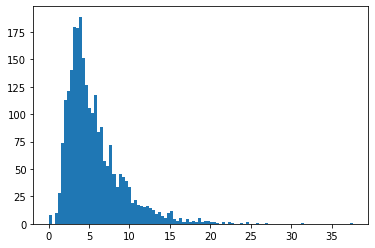

In [7]:
l=list(div_dic.values())
plt.hist(l,bins=100)
n =len(l)
diff_list = [abs(l[i]-l[j]) for i,j in it.combinations(range(n),2)]

(array([2.62669e+05, 2.55654e+05, 2.43556e+05, 2.27879e+05, 2.11578e+05,
        1.92827e+05, 1.72523e+05, 1.55445e+05, 1.38822e+05, 1.25237e+05,
        1.13069e+05, 1.00167e+05, 8.97000e+04, 7.99610e+04, 7.27170e+04,
        6.62040e+04, 5.83930e+04, 5.18690e+04, 4.63720e+04, 4.12250e+04,
        3.69880e+04, 3.22190e+04, 2.83860e+04, 2.59710e+04, 2.35340e+04,
        2.12360e+04, 1.92790e+04, 1.73430e+04, 1.59520e+04, 1.43590e+04,
        1.29760e+04, 1.15620e+04, 1.03870e+04, 9.24300e+03, 8.29900e+03,
        7.49200e+03, 6.57400e+03, 5.86400e+03, 5.50800e+03, 5.32800e+03,
        4.92400e+03, 4.53500e+03, 4.14700e+03, 3.90900e+03, 3.53000e+03,
        2.93600e+03, 2.56600e+03, 2.28000e+03, 1.98500e+03, 1.83700e+03,
        1.47900e+03, 1.37500e+03, 1.23900e+03, 1.14200e+03, 1.14300e+03,
        9.99000e+02, 8.62000e+02, 7.54000e+02, 7.17000e+02, 6.49000e+02,
        5.58000e+02, 4.19000e+02, 3.96000e+02, 3.57000e+02, 2.58000e+02,
        2.41000e+02, 2.23000e+02, 2.01000e+02, 1.51

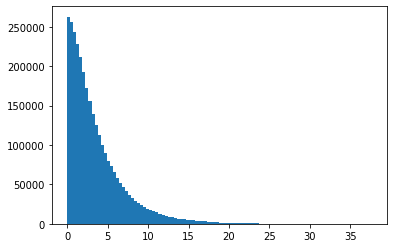

In [8]:
plt.hist(diff_list,bins=100)

In [9]:
r = len([x for x in diff_list if x <= 0.1])/len(diff_list)
print(r)

0.02282463011880441
